In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def phi(t):
    return np.sin(t + np.pi/4)

def dphi(t):
    return np.cos(t + np.pi/4)

def y_exact(t, L, y0):
    return -np.exp(-L*t)*(y0 - phi(0)) + phi(t)

In [62]:
iters = 24
d = 5/iters
T = 10
gamma = 1 - 1/np.sqrt(2)
L = 1e4
y0 = np.sin(np.pi/4)
err_d2 = []
h_list = np.array([10**(-(1 + i*d)) for i in range(iters + 1)])

for i in range(iters + 1):
    h = h_list[i]
    N = int(T/h)
    u = np.zeros(N + 1)
    u[0] = y0
    t = np.linspace(0, T, N + 1)
    for n in range(N):
        k1 = (-L*(u[n] - phi(t[n] + gamma*h)) + dphi(t[n] + gamma*h))/(1 + L*h*gamma)
        k2 = (-L*(u[n] + h*(1 - gamma)*k1 - phi(t[n] + h)) + dphi(t[n] + h))/(1 + L*h*gamma)
        u[n + 1] = u[n] + h*((1 - gamma)*k1 + gamma*k2)
    err_d2.append(max(np.abs(u - y_exact(t, L, y0))))
    print("done iter", i)

done iter 0
done iter 1
done iter 2
done iter 3
done iter 4
done iter 5
done iter 6
done iter 7
done iter 8
done iter 9
done iter 10
done iter 11
done iter 12
done iter 13
done iter 14
done iter 15
done iter 16
done iter 17
done iter 18
done iter 19
done iter 20
done iter 21
done iter 22
done iter 23
done iter 24


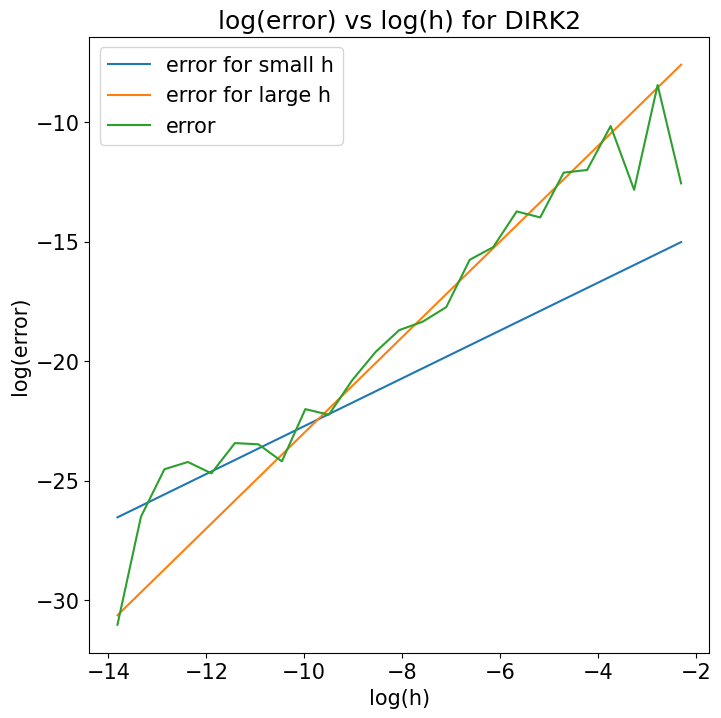

In [89]:
c1, c2 = 3e-6, 5e-2
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(np.log(h_list), np.log(c1*h_list), label = "error for small h")
plt.plot(np.log(h_list), np.log(c2*h_list**2), label = "error for large h")
plt.plot(np.log(h_list), np.log(err_d2), label = "error")
plt.title("log(error) vs log(h) for DIRK2")
plt.xlabel("log(h)")
plt.ylabel("log(error)")
plt.legend()
plt.savefig('hw3 dirk2 err.png')
plt.show()

In [80]:
iters = 24
d = 5/iters
T = 10
gamma = 1/2 + np.sqrt(3)/6
L = 1e4
y0 = np.sin(np.pi/4)
err_d3 = []
h_list = np.array([10**(-(1 + i*d)) for i in range(iters + 1)])

for i in range(iters + 1):
    h = h_list[i]
    N = int(T/h)
    u = np.zeros(N + 1)
    u[0] = y0
    t = np.linspace(0, T, N + 1)
    for n in range(N):
        k1 = (-L*(u[n] - phi(t[n] + gamma*h)) + dphi(t[n] + gamma*h))/(1 + L*h*gamma)
        k2 = (-L*(u[n] + h*(1 - 2*gamma)*k1 - phi(t[n] + (1 - gamma)*h)) + dphi(t[n] + (1 - gamma)*h))/(1 + L*h*gamma)
        u[n + 1] = u[n] + h/2*(k1 + k2)
    err_d3.append(max(np.abs(u - y_exact(t, L, y0))))
    print("done iter", i)

done iter 0
done iter 1
done iter 2
done iter 3
done iter 4
done iter 5
done iter 6
done iter 7
done iter 8
done iter 9
done iter 10
done iter 11
done iter 12
done iter 13
done iter 14
done iter 15
done iter 16
done iter 17
done iter 18
done iter 19
done iter 20
done iter 21
done iter 22
done iter 23
done iter 24


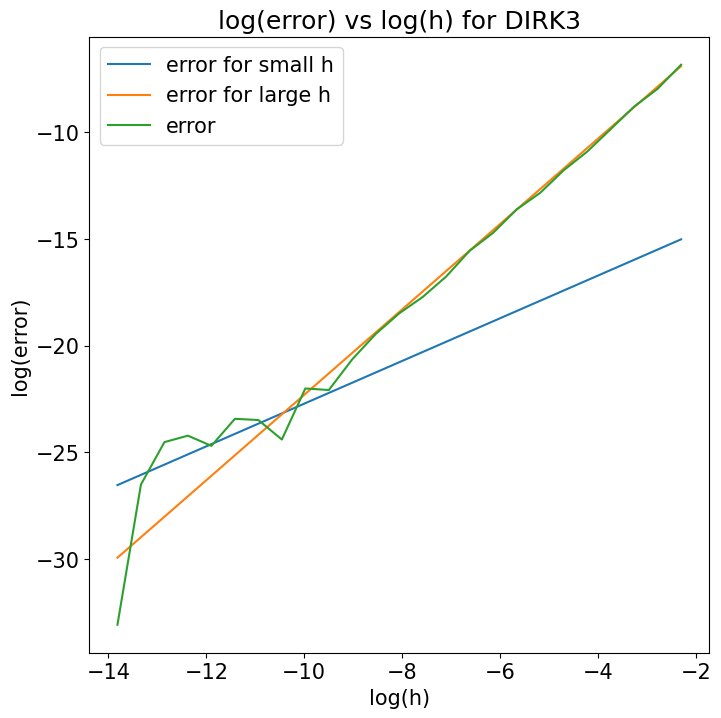

In [87]:
c1, c2 = 3e-6, 1e-1
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(np.log(h_list), np.log(c1*h_list), label = "error for small h")
plt.plot(np.log(h_list), np.log(c2*h_list**2), label = "error for large h")
plt.plot(np.log(h_list), np.log(err_d3), label = "error")
plt.title("log(error) vs log(h) for DIRK3")
plt.xlabel("log(h)")
plt.ylabel("log(error)")
plt.legend()
plt.savefig('hw3 dirk3 err.png')
plt.show()